## Credit score classification
In the modern financial landscape, credit scores play a pivotal role in determining an individual's financial health and access to various financial products and services. A credit score is a numerical representation of an individual's creditworthiness, calculated based on their credit history and other relevant financial factors. Lenders, such as banks and credit card companies, use credit scores to assess the risk of lending money or extending credit to individuals.

In this context, credit score classification refers to the categorization of credit scores into distinct groups based on predefined ranges. These classifications serve as a benchmark for assessing an individual's creditworthiness and determining their eligibility for credit products, interest rates, and loan terms.

The data for this analysis was sourced from kaggle (Data link - [link](https://www.kaggle.com/datasets/sudhanshu2198/processed-data-credit-score))
. This classifies the scores into standard, poor, and good with specific attributes and score ranges associated with each category and various other aspects.




In [ ]:
## import required libraries
import pandas as pd

### Data Loading and processing

In [ ]:
file_path = r'/content/Score.csv'
data = pd.read_csv(file_path)

In [ ]:
data.shape

(99960, 21)

In [ ]:
data.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949


In [ ]:
data.isnull().sum().any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

In [ ]:
target_col = 'Credit_Score'

In [ ]:
data[target_col].value_counts(normalize=True)

Standard    0.531703
Poor        0.289996
Good        0.178301
Name: Credit_Score, dtype: float64

In [ ]:
y =  data[[target_col]]
X = data.drop(target_col, axis=1)


In our entire data, the proportion of all the 3 classes is not similar.

A random train test split might not be correct because there is a chance that, all samples of minority class might go into training and we might not have a chance to evaluate prediction of minority class. Hence, proceed with stratified train test split whcih allows for similar distribution of target in train and test sets.

**Perfomed Stratified Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify = y, test_size = 0.30)

In [ ]:
X_train.shape,y_train.shape,X_test.shape , y_test.shape

((69972, 20), (69972, 1), (29988, 20), (29988, 1))

In [ ]:
y_train.value_counts(normalize=True)

Credit_Score
Standard        0.531698
Poor            0.290002
Good            0.178300
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

Credit_Score
Standard        0.531713
Poor            0.289983
Good            0.178305
dtype: float64

We can see that both train and test sets have same distribution of target column.

Since there are categorical columns, convert them into numeric values either by one-hot encoding or label encoding or some other kindof transformation.

Since policy_id is just an identifier and is random and doesnt effect their insurance claim decision, dropping that column.

In [ ]:
data_cols = X_train.columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
for col in data_cols:
  if X_train[col].dtype == object:
    print(col, X_train[col].nunique() )

Payment_of_Min_Amount 3
Credit_Mix 3
Payment_Behaviour 6


Since all the above 3 categorical columns have small number of nunique values, one hot encoding can be performed on the above categorical columns.

In [ ]:
for col in data_cols:
  if X_train[col].dtype == object:
    # encoding using onehot encoder
    ohe = OneHotEncoder(drop='first')
    ohe.fit(X_train[[col]])
    X_train[ohe.get_feature_names_out().tolist()] = ohe.transform(X_train[[col]]).toarray()
    X_test[ohe.get_feature_names_out().tolist()] = ohe.transform(X_test[[col]]).toarray()
    # Done with feature encoding, now dropping the actual categorical columns.
    X_train.drop(col,axis=1,inplace=True)
    X_test.drop(col,axis=1,inplace=True)


In [ ]:
X_train.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,...,Total_EMI_per_month,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,...,69972.000000,69972.000000,69972.000000,69972.00000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000
mean,21.096253,13.334648,5.768779,32.274129,221.094366,194.098588,403.554883,33.276468,50518.641380,5.370177,...,105.542038,0.356671,0.523324,0.30415,0.457683,0.266950,0.065526,0.057680,0.102955,0.338607
std,14.822407,6.265395,3.857986,5.121105,99.639083,195.697572,214.471644,10.762144,38355.377666,2.596231,...,127.016879,0.479020,0.499459,0.46005,0.498210,0.442369,0.247454,0.233139,0.303903,0.473239
min,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.007760,14.000000,7005.930000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,9.000000,3.000000,28.044842,145.000000,73.534845,270.237133,24.000000,19397.325000,3.000000,...,29.105604,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,14.000000,5.000000,32.269788,219.000000,129.723157,337.833914,33.000000,36964.080000,5.000000,...,66.058063,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,18.000000,8.000000,36.495345,302.000000,234.418613,472.102561,42.000000,71689.680000,7.000000,...,144.923526,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,67.000000,28.000000,29.000000,50.000000,404.000000,1961.218850,1602.040519,56.000000,179987.280000,10.000000,...,1779.103254,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Few columns have values which are in higher range like 50,000's, 500s and it would be difficult for the model to converge, hence scale the columns.

In [ ]:
temp = X_train.describe()
temp = pd.DataFrame(temp.loc['mean']>10)
scale_cols = temp[temp['mean']==True].index

In [ ]:
from sklearn.preprocessing import StandardScaler

std_slr = StandardScaler()
std_slr.fit(X_train[scale_cols])


X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_cols] = std_slr.transform(X_train[scale_cols])
X_test_scaled[scale_cols] = std_slr.transform(X_test[scale_cols])

X_train_scaled = X_train_scaled.to_numpy()
X_test_scaled = X_test_scaled.to_numpy()

Since our target column is categorical, we need to encode the target variable using one hot encoder.

In [ ]:
col = 'Credit_Score'
ohe_target = OneHotEncoder()
ohe_target.fit(y_train[[col]])
y_train = ohe_target.transform(y_train[[col]]).toarray()
y_test = ohe_target.transform(y_test[[col]]).toarray()

In [ ]:
X_train_scaled.shape,y_train.shape, X_test_scaled.shape,y_test.shape

((69972, 26), (69972, 3), (29988, 26), (29988, 3))

Done with data processing and train test set creation.

### Model Building

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [ ]:
import time
import numpy as np
from sklearn.metrics import accuracy_score

hidden_layer = [64,32]
activation_func = 'tanh'
train_sizes = [0.25,0.5,0.75,1]


losses = []
for train_percent in train_sizes:
  time_start = time.time()
  clf = MLPClassifier(random_state=1, hidden_layer_sizes=hidden_layer,activation= activation_func)

  rows_id = np.random.randint(X_train_scaled.shape[0], size=int(train_percent*X_train_scaled.shape[0]))

  X_train_temp = X_train_scaled[rows_id, :]
  y_train_temp = y_train[rows_id,:]

  clf.fit(X_train_temp,y_train_temp)
  losses.append((train_percent,clf.loss_curve_))

  print(f'Done model by training with {train_percent} of the training data of size {X_train_temp.shape} ')
  print('time taken', time.time()- time_start)

  y_train_pred = clf.predict(X_train_temp)
  y_test_pred = clf.predict(X_test_scaled)

  train_acc = accuracy_score(y_train_temp,y_train_pred)
  test_acc = accuracy_score(y_test,y_test_pred)

  print('train accuracy', train_acc)
  print('test accuracy', test_acc)

  print(metrics.classification_report(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Done model by training with 0.25 of the training data of size (17493, 26) 
time taken 48.85751819610596
train accuracy 0.7341793860401303
test accuracy 0.6403227957849806
              precision    recall  f1-score   support

           0       0.61      0.51      0.55      5347
           1       0.69      0.68      0.68      8696
           2       0.75      0.71      0.73     15945

   micro avg       0.71      0.66      0.68     29988
   macro avg       0.68      0.63      0.65     29988
weighted avg       0.71      0.66      0.68     29988
 samples avg       0.65      0.66      0.66     29988



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Done model by training with 0.5 of the training data of size (34986, 26) 
time taken 95.83796858787537
train accuracy 0.7327788258160407
test accuracy 0.6484593837535014
              precision    recall  f1-score   support

           0       0.62      0.52      0.57      5347
           1       0.71      0.67      0.69      8696
           2       0.75      0.71      0.73     15945

   micro avg       0.72      0.67      0.69     29988
   macro avg       0.69      0.64      0.66     29988
weighted avg       0.72      0.67      0.69     29988
 samples avg       0.66      0.67      0.66     29988



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Done model by training with 0.75 of the training data of size (52479, 26) 
time taken 146.70163440704346
train accuracy 0.743021017930982
test accuracy 0.6626650660264105
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      5347
           1       0.71      0.69      0.70      8696
           2       0.76      0.73      0.74     15945

   micro avg       0.73      0.69      0.71     29988
   macro avg       0.70      0.66      0.68     29988
weighted avg       0.72      0.69      0.70     29988
 samples avg       0.67      0.69      0.68     29988



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Done model by training with 1 of the training data of size (69972, 26) 
time taken 194.6551866531372
train accuracy 0.7414394329160235
test accuracy 0.6664332399626517
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      5347
           1       0.72      0.68      0.70      8696
           2       0.76      0.73      0.75     15945

   micro avg       0.73      0.69      0.71     29988
   macro avg       0.71      0.66      0.68     29988
weighted avg       0.73      0.69      0.71     29988
 samples avg       0.68      0.69      0.68     29988



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for train_percent, loss in losses:
  print(train_percent)

0.25
0.5
0.75
1


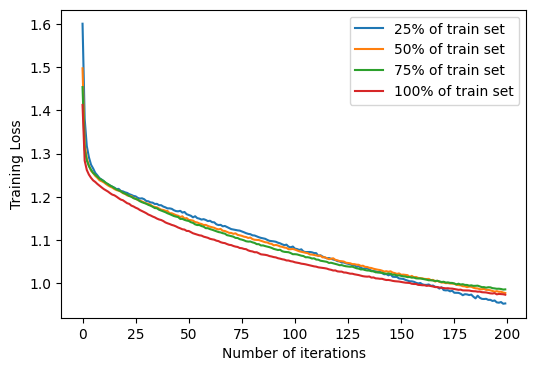

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(losses[0][1],label = '25% of train set')
ax.plot(losses[1][1],label = '50% of train set')
ax.plot(losses[2][1],label = '75% of train set')
ax.plot(losses[3][1],label = '100% of train set')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Training Loss')
plt.legend()
plt.show()
